# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

In [2]:
import requests
import time
from tqdm.auto import tqdm

In [3]:
sber = '3529'
page = 1
num_per_page = 100
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [4]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
print(num_pages)

20


In [5]:
#собираем вакансии по всем страницам
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    #по следующей конструкции у меня есть некоторое непонимание:
    #vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    #поэтому я сделал простой цикл в цикле
    for j in range(len(vacancies.get('items'))):
        vacancy_ids = vacancies.get('items')[j].get('id')
        all_vacancy_ids.append(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [6]:
#буду разделять каждые 20 запросов таймаутом в 10 секунд для избежания ввода капчи
id_list = []
for i in tqdm(range(len(all_vacancy_ids))):
    if i%20 == 0: time.sleep(10)
    url = f'https://api.hh.ru/vacancies/{all_vacancy_ids[i]}'
    res = requests.get(url)
    wanted_vacs = res.json()
    id_list.append(wanted_vacs)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [7]:
#Создайте DataFrame в котором будут даты публикации вакансий, названия, описания, только добавьте поле ключевые навыки
import pandas as pd
vacs_table = pd.DataFrame(id_list, columns = ['name', 'published_at', 'description', 'key_skills'])

In [ ]:
#Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
#Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
#Найдите вакансии с использованием python, которые вам интересны
#Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
#Постройте график наиболее востребованных навыков

In [8]:
vacs_table.head()

,name,published_at,description,key_skills
0,QA engineer Junior (нагрузочное тестирование),2023-03-22T13:26:03+0300,<p><strong>Команда нагрузочного тестирования р...,[{'name': 'Нагрузочное тестирование'}]
1,Тестировщик (QA – engineer),2023-03-22T11:53:24+0300,<p><strong>Наш проект</strong> - возможность п...,[]
2,Стажер,2023-03-10T11:13:27+0300,<p>Мы приглашаем исследователей в области маши...,[]
3,Финансовый консультант,2023-03-14T11:22:39+0300,<p> </p> <p><strong>Финансовый консультант </s...,"[{'name': 'Деловое общение'}, {'name': 'Активн..."
4,Project manager,2023-03-24T13:15:24+0300,<p>Мы занимаемся построением рекомендательной ...,"[{'name': 'SQL'}, {'name': 'BPMN'}, {'name': '..."


In [139]:
#обработка содержимого ДФ
import datetime
import re
#добавляем новый столбец для заполнения названиями дней недели
vacs_table['weekday'] = ''
for i in range(vacs_table.shape[0]):
    key_skills_list = []
    #Переведите даты публикаций в формат datetime
    #если объект не является датой, то корректируем данные в таблице
    if isinstance(vacs_table.published_at[i], datetime.date) == False:
        qqq = datetime.date(int(vacs_table.published_at[i][0:4]),int(vacs_table.published_at[i][5:7]),int(vacs_table.published_at[i][8:10]))
        vacs_table.published_at.replace(vacs_table.published_at[i], qqq, inplace=True)
    #Переведите даты в названия дней недели
    www = qqq.weekday()
    if www == 0: www = "понедельник"
    elif www == 1: www = "вторник"
    elif www == 2: www = "среда"
    elif www == 3: www = "четверг"
    elif www == 4: www = "пятница"
    elif www == 5: www = "суббота"
    elif www == 6: www = "воскресение"
    vacs_table.weekday[i] = www
    #убираем теги из описания вакансий
    vacs_table.description.replace(vacs_table.description[i], re.sub(r'<.*?>', '', str(vacs_table.description[i])), inplace=True)
    #приводим в порядок ключевые навыки (разбираем список и словарь, переводит в аккуратную строку)
    for j in range(len(vacs_table.key_skills[i])):
        key_skills_list.append(vacs_table.key_skills[i][j].get('name'))
    aaa
    for k in range(len(key_skills_list)):
        if k>1: 
            aaa = aaa + ", " + key_skills_list[k]
            continue
        if len(key_skills_list) == 0: 
            aaa = ''
            break
        elif len(key_skills_list) == 1:
            aaa = str(key_skills_list[0])
            break
        else: 
            aaa = str(key_skills_list[0])
        aaa = aaa + ", " + key_skills_list[k]
    vacs_table.key_skills[i] = aaa
    aaa = ''

In [140]:
#проверяем итоговые данные
vacs_table.head()

,name,published_at,description,key_skills,weekday
0,QA engineer Junior (нагрузочное тестирование),2023-03-22,"Команда нагрузочного тестирования расширяется,...",Нагрузочное тестирование,среда
1,Тестировщик (QA – engineer),2023-03-22,Наш проект - возможность поучаствовать в разра...,,среда
2,Стажер,2023-03-10,Мы приглашаем исследователей в области машинно...,,пятница
3,Финансовый консультант,2023-03-14,Финансовый консультант Сбер — лучший рабо...,"Деловое общение, Активные продажи",вторник
4,Project manager,2023-03-24,Мы занимаемся построением рекомендательной сис...,"SQL, BPMN, Atlassian Confluence, Atlassian Jira",пятница


In [141]:
#проверяем итоговые данные
vacs_table.tail()

,name,published_at,description,key_skills,weekday
1995,Инженер по сопровождению,2023-03-13,Мы создаем платформу для установки и контроля ...,,понедельник
1996,Старший клиентский менеджер (Нефтекумск),2023-03-20,Сбер — лучший работодатель России. У нас более...,,понедельник
1997,Клиентский менеджер Сбербанк Премьер,2023-02-28,Сбер — лучший работодатель России. У нас более...,,вторник
1998,Старший менеджер по обслуживанию (п.Рязанцево),2023-03-11,Сбер — это 14 тысяч подразделений и лучший раб...,,суббота
1999,BI Developer,2023-03-09,Предметная область #Sberdata. Наша команда зан...,,четверг


In [147]:
#проверяем итоговые данные
vacs_table.sample(5)

,name,published_at,description,key_skills,weekday
1700,Главный архитектор,2023-03-03,Мы набираем команду для ООО «Центр новых финан...,,пятница
469,Junior DevOps инженер,2023-02-28,"Команда поддерживает, развивает и переносит на...","Jenkins, OpenShift, Корпоративная этика, Bitbu...",вторник
759,Разработчик интерфейсов/Frontend-разработчик в...,2023-03-06,В команду SberDevices ищем JavaScript-мастера....,"JavaScript, CSS, Redux, Node.js, HTML",понедельник
766,Персональный менеджер СберПервый,2023-03-24,Сбер — лучший работодатель России. У нас более...,,пятница
1363,Старший юрисконсульт,2023-03-20,В Юридическое управление в отдел защиты интере...,,понедельник


<AxesSubplot:xlabel='Дата размещения вакансии', ylabel='Количество вакансий'>

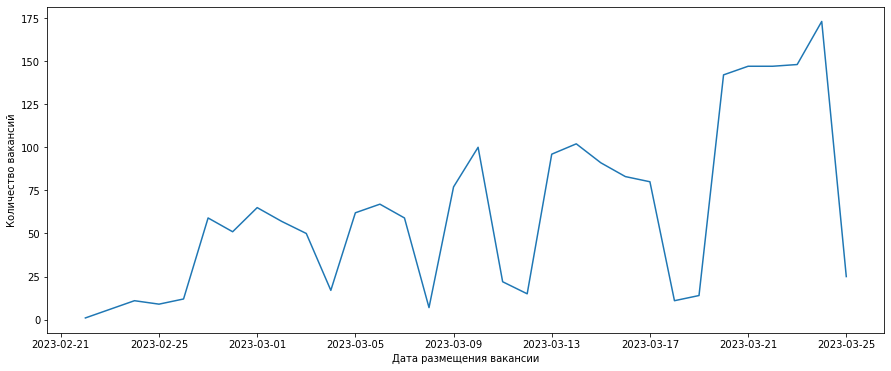

In [181]:
#постройте график опубликованных вакансий по датам
dates_visual = vacs_table.groupby('published_at')['name'].count()
dates_visual.plot(figsize=(15,6),
            xlabel='Дата размещения вакансии',
            ylabel='Количество вакансий'
         )

In [236]:
#определите день недели, в который больше всего публикуют вакансий
weekdates_table = vacs_table.groupby('weekday')['name'].count()
qqq = weekdates_table.sort_values(ascending=False).head(1)
print('Наибольшее количество публикаций вакансий происходит в следующий день недели:', qqq.index[0])

Наибольшее количество публикаций вакансий происходит в следующий день недели: пятница


In [240]:
#Найдите вакансии с использованием python, которые вам интересны
#vacs_table.key_skills
for i in range(vacs_table.shape[0]):
    if vacs_table.key_skills[i].find('ython') != -1 and (vacs_table.name[i].find('Аналитик данных') != -1 or vacs_table.name[i].find('Data Analyst') != -1):
        print(vacs_table.name[i])

Аналитик данных
Аналитик данных / Data Analyst
Data Analyst (Anti-fraud)
Data Analyst (Предиктивная аналитика)


In [279]:
#Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
my_fav_vac_reqs = []
all_vac_reqs = []
ggg = 0
yyy = ''
for i in range(vacs_table.shape[0]):
    sss = vacs_table.key_skills[i].split(',')
    for j in range(len(sss)):
        if sss[j] != '': 
            all_vac_reqs.append(sss[j].lstrip())
            if vacs_table.key_skills[i].find('ython') != -1 and (vacs_table.name[i].find('Аналитик данных') != -1 or vacs_table.name[i].find('Data Analyst') != -1):
                my_fav_vac_reqs.append(sss[j].lstrip())
for i in my_fav_vac_reqs:
    www = my_fav_vac_reqs.count(i)
    if www > ggg:
        ggg = www
        yyy = i
print("Самый востребованный навык для моих вакансий - ", yyy, ', указан ', ggg, ' раз[а]')
for i in all_vac_reqs:
    www = all_vac_reqs.count(i)
    if www > ggg:
        ggg = www
        yyy = i
print("Самый востребованный навык для всех найденных вакансий Сбербанка - ", yyy, ', указан ', ggg, ' раз[а]')

Самый востребованный навык для моих вакансий -  Python , указан  4  раз[а]
Самый востребованный навык для всех найденных вакансий Сбербанка -  Работа в команде , указан  62  раз[а]


<AxesSubplot:xlabel='Ключевые навыки', ylabel='Количество упоминаний'>

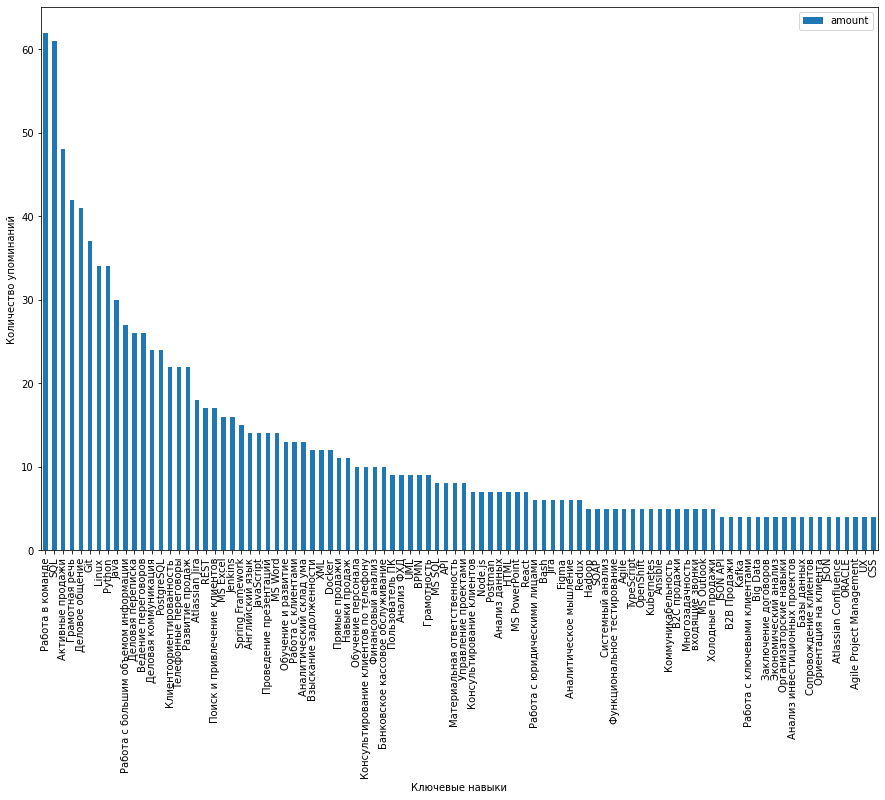

In [320]:
#Постройте график наиболее востребованных навыков
all_vacs_reqs_plot_data = {}
for i in all_vac_reqs:
    www = all_vac_reqs.count(i)
    all_vacs_reqs_plot_data[i] = www
df = pd.DataFrame.from_dict(all_vacs_reqs_plot_data, orient='index').reset_index()
df.columns = ['name', 'amount']
df.sort_values(by=['amount'], ascending=False, inplace=True)
#удалим те ключевые навыки, где упоминание меньше 4 раз (для визуального удобства при построении графика)
df = df[df.amount > 3]
df.plot(x='name',
            y='amount',
            figsize=(15,10),
            xlabel='Ключевые навыки',
            ylabel='Количество упоминаний',
            kind='bar'
           )